In [1]:
#Iam Manal Mohamed Alnaseef 
# this is my project in(Video Game Sales)

In [30]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn as svm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import tree
import patsy
import statsmodels.api as sm




In [31]:
#read my dataset
vgsales=pd.read_csv('vgsales.csv')

In [32]:
vgsales.shape

(16598, 11)

In [33]:
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [34]:
vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [35]:
#Data cleaning
#check out the NA Value inside the dataset
vgsales.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [36]:
# remove the NA Value inside the dataset
vgsales = vgsales.dropna()
vgsales.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [37]:
# New DataBase without any NA Value
# (16291,11) its new value
vgsales.shape

(16291, 11)

In [38]:
vgsales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [39]:
gameNames = vgsales['Name'].unique()
publisherNames = vgsales['Publisher'].unique()
platformNames = vgsales['Platform'].unique()
genreNames = vgsales['Genre'].unique()
print("There are",len(gameNames),"games in the data set.")
print("There are",len(publisherNames),"publishers in the data set.")
print("There are",len(platformNames),"platforms in the data set.")
print("There are",len(genreNames),"different genres in the data set.")

There are 11325 games in the data set.
There are 576 publishers in the data set.
There are 31 platforms in the data set.
There are 12 different genres in the data set.


In [40]:
vgsales[["Genre","Global_Sales"]].groupby("Genre").sum()

,Global_Sales
Genre,
Action,1722.84
Adventure,234.59
Fighting,444.05
Misc,789.87
Platform,829.13
Puzzle,242.21
Racing,726.76
Role-Playing,923.83
Shooter,1026.20


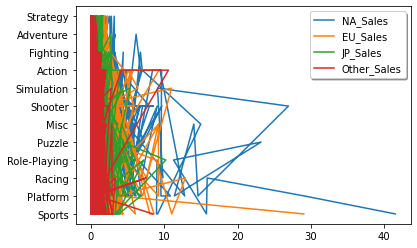

In [41]:
# visualization use plot to appeare realtion between North Amrica Sales , Euorp Sales,Japan Sales and Other Sales 
vg_JP= vgsales.JP_Sales
vg_EU= vgsales.EU_Sales
vg_NA= vgsales.NA_Sales
vg_ot= vgsales.Other_Sales
vg_GL=vgsales.Global_Sales
vg_G=vgsales.Genre
vg_publisher=vgsales.Publisher



plt.plot(vg_NA,vg_G)
plt.plot(vg_EU,vg_G)
plt.plot(vg_JP,vg_G)
plt.plot(vg_ot,vg_G)
plt.legend(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],shadow = True, loc = 0);

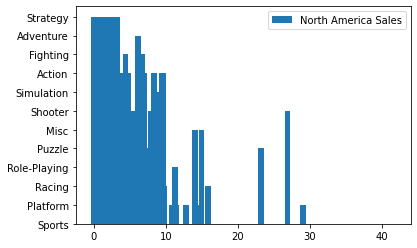

In [42]:
# visualization use bar to appear how many copies sold in North America from specific Game Genre
plt.bar(vg_NA,vg_G);
plt.legend(['North America Sales'],shadow = False);

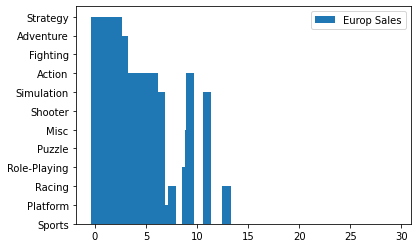

In [43]:
# visualization use bar to appear how many copies sold in Europ from specific Game Genre
plt.bar(vg_EU,vg_G);
plt.legend(['Europ Sales'],shadow = False);

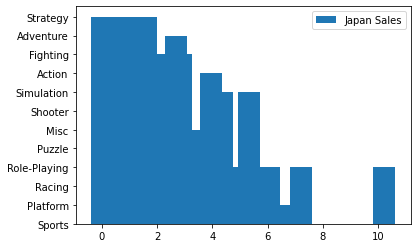

In [44]:
# visualization use bar to appear how many copies sold in Japan from specific Game Genre
plt.bar(vg_JP,vg_G);
plt.legend(['Japan Sales'],shadow = False ,loc = 0 );

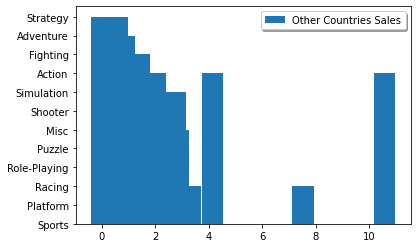

In [45]:
# visualization use bar to appear how many copies sold in Other Countries from specific Game Genre
plt.bar(vg_ot,vg_G);
plt.legend(['Other Countries Sales'],shadow = True ,loc = 0);

In [46]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [47]:
#Q1: Which Game Has Highest Sales in Europ ?
EU_sales_df=vgsales.drop(['NA_Sales','JP_Sales', 'Other_Sales', 'Global_Sales'],axis=1)
EU_sales_df

,Rank,Name,Platform,Year,Genre,Publisher,EU_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,29.02
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,3.58
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,12.88
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,11.01
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,8.89
...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.00
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.00
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.01


In [48]:
# here answer Q1
highest_game_sales_inEurop=EU_sales_df.sort_values("EU_Sales",ascending=False)
highest_game_sales_inEurop



,Rank,Name,Platform,Year,Genre,Publisher,EU_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,29.02
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,12.88
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,11.01
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,11.00
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,9.27
...,...,...,...,...,...,...,...
10672,10674,Crime Crackers,PS,1994.0,Role-Playing,Sony Computer Entertainment,0.00
10671,10673,Sword Art Online: Lost Song,PS3,2015.0,Role-Playing,Namco Bandai Games,0.00
10668,10670,Kiku! Kaku! Kotoba o Fuyasu! Hajimete no Eigo ...,DS,2007.0,Misc,Benesse,0.00
10667,10669,NASCAR '14,PS3,2014.0,Racing,Deep Silver,0.00


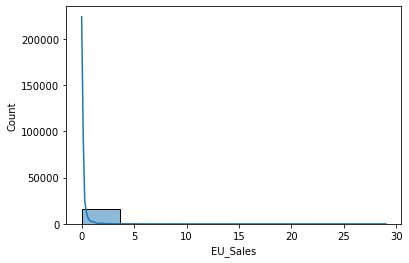

In [49]:
# visualization use histplot to appeare sales in Euorp
sns.histplot(vgsales['EU_Sales'],bins=8, kde=True);

In [50]:
#Q2: do you Genre (Sports) the highest sales?
Sport_Genre_VG=vgsales.query('Genre =="Sports"')
Sport_Genre_VG

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
...,...,...,...,...,...,...,...,...,...,...,...
16576,16579,Rugby Challenge 3,XOne,2016.0,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01
16578,16581,Outdoors Unleashed: Africa 3D,3DS,2011.0,Sports,Mastiff,0.01,0.00,0.00,0.00,0.01
16579,16582,PGA European Tour,N64,2000.0,Sports,Infogrames,0.01,0.00,0.00,0.00,0.01
16581,16584,Fit & Fun,Wii,2011.0,Sports,Unknown,0.00,0.01,0.00,0.00,0.01


In [51]:
# here answer Q2
Sport_Genre_highest_sales=Sport_Genre_VG.sort_values("Global_Sales",ascending=False)
Sport_Genre_highest_sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
...,...,...,...,...,...,...,...,...,...,...,...
16179,16182,Sega Golf Club: Miyazato San Kyoudai Naizou,PS3,2006.0,Sports,Sega,0.00,0.00,0.01,0.00,0.01
16218,16221,Family Jockey,Wii,2008.0,Sports,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16226,16229,Victory Spike,PS,1996.0,Sports,Imagineer,0.00,0.00,0.01,0.00,0.01
16258,16261,Championship Manager 2010,PC,2009.0,Sports,Eidos Interactive,0.00,0.01,0.00,0.00,0.01


In [52]:
#Q3: where the video Game from publisher (Infogrames) & platform  GC?
Infogrames_VG=vgsales.query('Publisher=="Infogrames"')
Infogrames_VG

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
825,827,Sonic Mega Collection,GC,2002.0,Misc,Infogrames,1.47,0.48,0.05,0.06,2.05
1068,1070,Dragon Ball Z: The Legacy of Goku,GBA,2002.0,Role-Playing,Infogrames,1.52,0.12,0.00,0.05,1.69
2384,2386,Need for Speed: V-Rally,PS,1997.0,Racing,Infogrames,0.43,0.29,0.09,0.06,0.87
2634,2636,Doom,PS,1994.0,Shooter,Infogrames,0.43,0.30,0.00,0.05,0.78
3363,3365,NASCAR Heat 2002,PS2,2001.0,Racing,Infogrames,0.29,0.23,0.00,0.08,0.60
...,...,...,...,...,...,...,...,...,...,...,...
14492,14495,Starshot: Space Circus Fever,N64,1998.0,Platform,Infogrames,0.02,0.01,0.00,0.00,0.03
15502,15505,Hogs of War,PS,2000.0,Strategy,Infogrames,0.01,0.01,0.00,0.00,0.02
15924,15927,RollerCoaster Tycoon: Gold Edition,PC,2002.0,Strategy,Infogrames,0.01,0.00,0.00,0.00,0.02
16579,16582,PGA European Tour,N64,2000.0,Sports,Infogrames,0.01,0.00,0.00,0.00,0.01


In [53]:
# here answer Q3
Game_Infogrames_GC=vgsales.query('Platform=="GC"')
Game_Infogrames_GC

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
107,108,Super Smash Bros. Melee,GC,2001.0,Fighting,Nintendo,4.41,1.04,1.39,0.22,7.07
110,111,Mario Kart: Double Dash!!,GC,2003.0,Racing,Nintendo,4.12,1.77,0.87,0.19,6.95
135,136,Super Mario Sunshine,GC,2002.0,Platform,Nintendo,4.01,1.26,0.87,0.17,6.31
232,233,The Legend of Zelda: The Wind Waker,GC,2002.0,Action,Nintendo,2.60,0.99,0.89,0.13,4.60
356,357,Luigi's Mansion,GC,2001.0,Action,Nintendo,2.38,0.67,0.46,0.10,3.60
...,...,...,...,...,...,...,...,...,...,...,...
16387,16390,Darkened Skye,GC,2002.0,Adventure,TDK Mediactive,0.01,0.00,0.00,0.00,0.01
16464,16467,Egg Mania: Eggstreme Madness,GC,2002.0,Puzzle,Kemco,0.01,0.00,0.00,0.00,0.01
16475,16478,Space Raiders,GC,2003.0,Shooter,Taito,0.01,0.00,0.00,0.00,0.01
16584,16587,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01


In [54]:
Game_Infogrames_GC.shape

(542, 11)

In [55]:
#Q4: What is the publisher with the highest sales?
# answer Q4
vgsales.groupby('Publisher')[['Global_Sales']].max()



,Global_Sales
Publisher,
10TACLE Studios,0.06
1C Company,0.05
20th Century Fox Video Games,0.79
2D Boy,0.04
3DO,1.28
...,...
id Software,0.03
imageepoch Inc.,0.03
inXile Entertainment,0.10


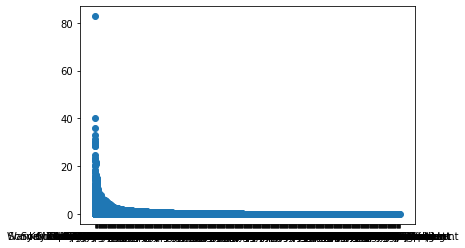

In [56]:
# visualization use scatter to appear sales in Global per publisher

plt.scatter(vg_publisher,vg_GL);

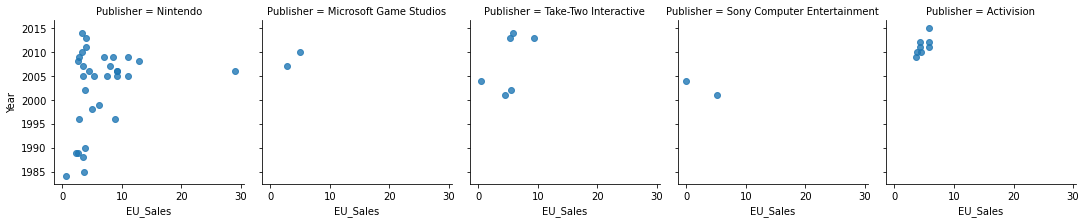

In [57]:
# plot with matplotlib to show sales in Europ per year with some publisher (50)
vgsale=vgsales.head(50)
sns.lmplot(x="EU_Sales", y="Year", col="Publisher", fit_reg=False,
           ci=None, data=vgsale, height=3)

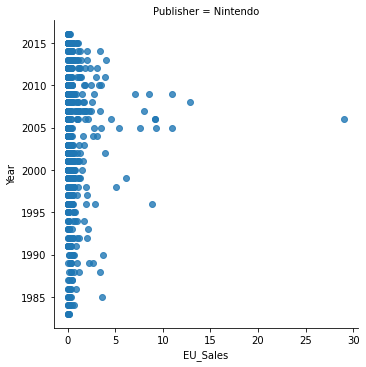

In [58]:
# plot with matplotlib to show sales in Europ per year with specific publisher (Nintendo)
sns.lmplot(
    x="EU_Sales", y="Year", ci=None, fit_reg=False, col="Publisher", data=vgsales.query("Publisher=='Nintendo'"), height=5);

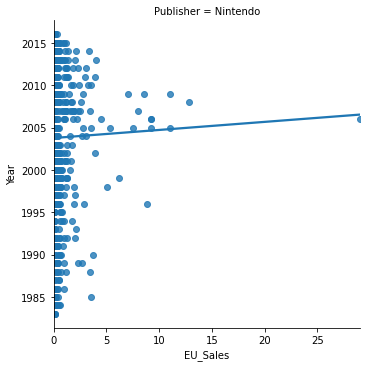

In [59]:
sns.lmplot(
    x="EU_Sales", y="Year", ci=None, col="Publisher", data=vgsales.query("Publisher=='Nintendo'"));

In [60]:
#Q5: what is the predict for Global Sales ?

In [61]:
vgsales.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178027,-0.400315,-0.379137,-0.269323,-0.332735,-0.426975
Year,0.178027,1.000000,-0.091285,0.006108,-0.169387,0.041128,-0.074647
NA_Sales,-0.400315,-0.091285,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,-0.379137,0.006108,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,-0.269323,-0.169387,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,-0.332735,0.041128,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,-0.426975,-0.074647,0.941269,0.903264,0.612774,0.747964,1.000000


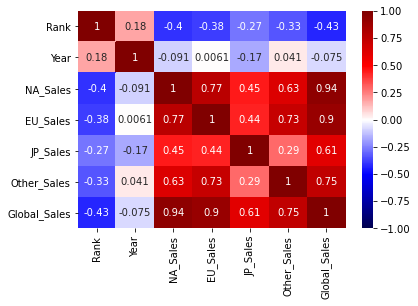

In [62]:
sns.heatmap(vgsales.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

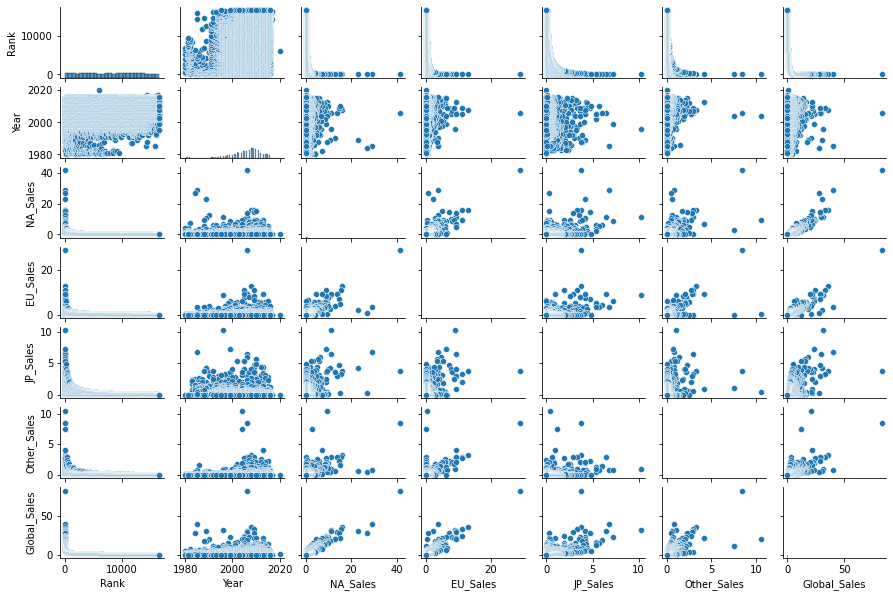

In [63]:
sns.pairplot(vgsales, height=1.2, aspect=1.5)

In [64]:
# Create your feature matrix (X)=NA_Sales + EU_Sales + JP_Sales + Other_Sales' and target vector (y)=Global_Sales
y, X = patsy.dmatrices(' Global_Sales ~ NA_Sales + EU_Sales + JP_Sales + Other_Sales',
                       data=vgsales, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.666e+08
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:00:25   Log-Likelihood:                 62488.
No. Observations:               16291   AIC:                        -1.250e+05
Df Residuals:                   16286   BIC:                        -1.249e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0003   4.34e-05      7.312      0.000       0.000       0.000
NA_Sales        1.0000   8.09e-05   1.24e+04      0.000       1.000       1.000
EU_Sales        1.0000      0.000   6860.840      0.000       1.000       1.000
JP_Sales        0.9999      0.000   6693.685      0.000       1.000       1.000
Other_Sales     0.9996      0.000   3133.030      0.000       0.999       1.000
==============================================================================
Omnibus:                      213.175   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              384.002
Skew:                           0.047   Prob(JB):                     4.12e-84
Kurtosis:                       3.746   Cond. No.                         9.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
#Regression Model
# we will use Linear Regression
VGlr = LinearRegression()
VGlr.fit(X,y)
VGlr.score(X,y) # this is score

0.9999888947902307

In [66]:
# here error prediction 
y_pred = VGlr.predict(X)
print(metrics.mean_absolute_error(y, y_pred))

0.002926200447230511


In [67]:
# here use DecisionTreeRegressor
VGDt= DecisionTreeRegressor(max_depth=5)
VGDt.fit(X, y)
VGDt.score(X,y)

0.9663650563603728

In [68]:

y_VGDt = VGDt.predict(X)
print(metrics.mean_absolute_error(y, y_VGDt))

0.14535107053598403


In [69]:
#Q6 :what is the  volume predict of sales for each Game ?

In [70]:
# We bring minimum value from Global Sales
vgsales.Global_Sales.min()

0.01

In [71]:
# We bring maximum value from Global Sales
vgsales.Global_Sales.max()

82.74

In [72]:
# make condition if Global sales value greater than 10 million copies put in 'Volume_Of_Sales' High
vgsales.loc[vgsales['Global_Sales']> 10 , 'Volume_Of_Sales'] = 'High'

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [73]:
# make condition if Global sales value less than 10 million copies put in 'Volume_Of_Sales' Low
vgsales.loc[vgsales['Global_Sales']< 10, 'Volume_Of_Sales'] = 'Low'

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [74]:
vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Volume_Of_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,High
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,High
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,High
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,High
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,High
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,Low
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,Low
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,Low
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,Low


In [75]:
vgsales.shape


(16291, 12)

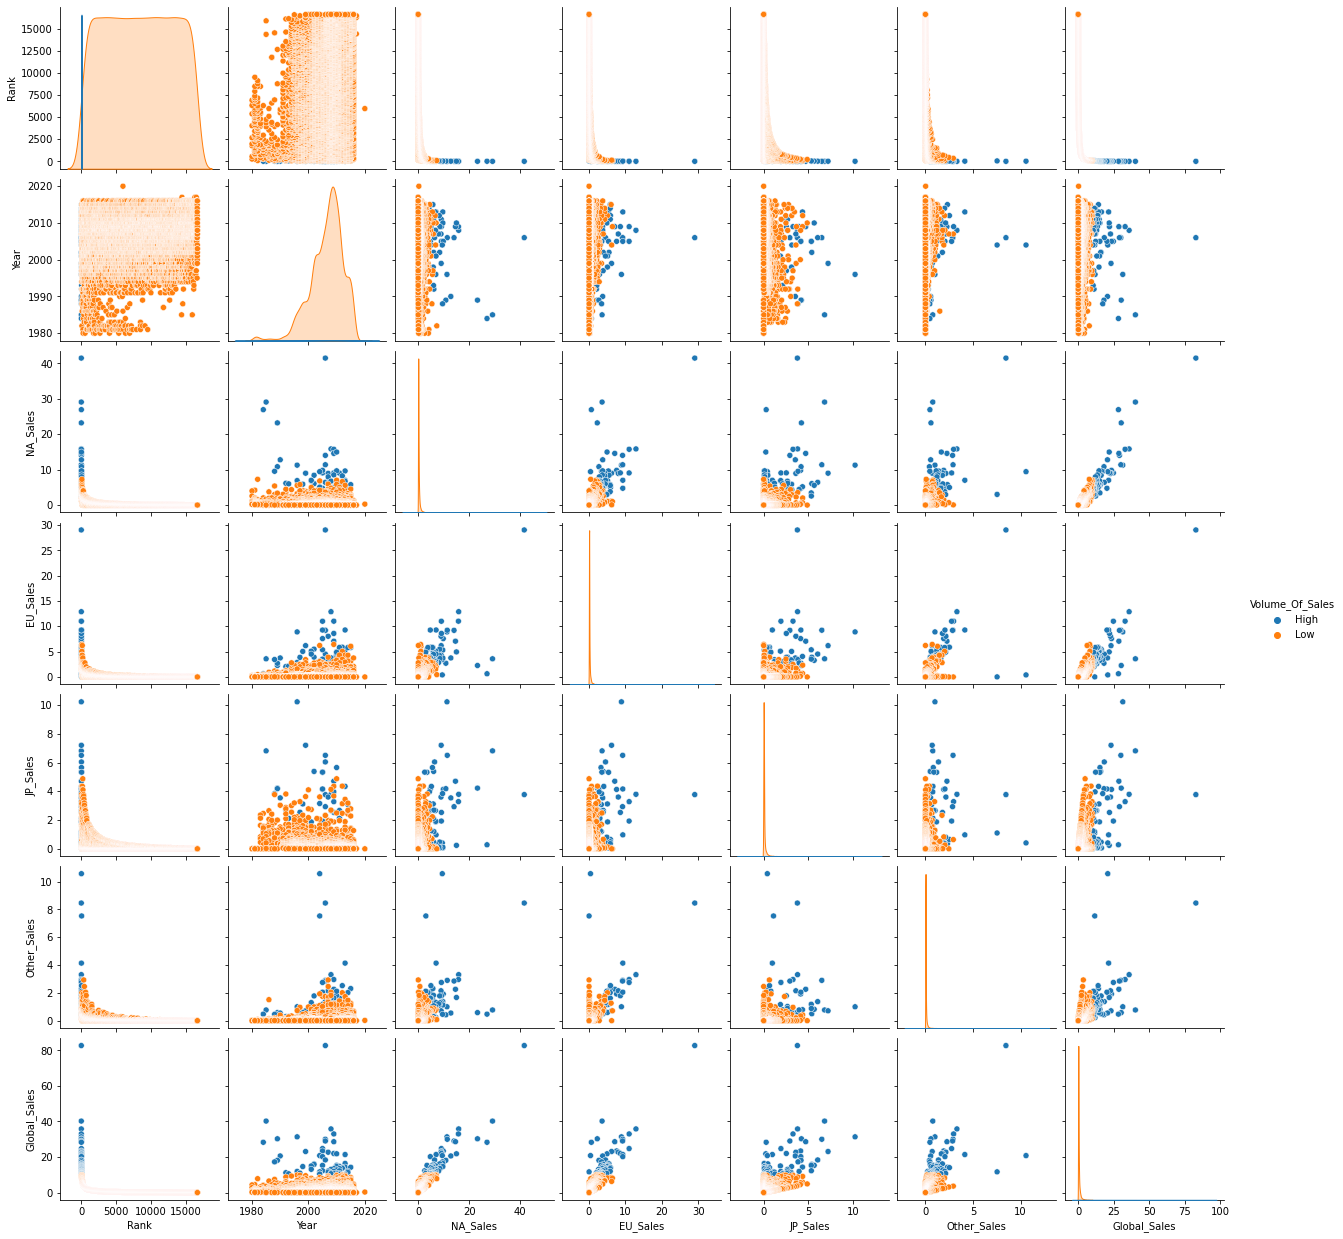

In [76]:
sns.pairplot(vgsales, hue='Volume_Of_Sales');

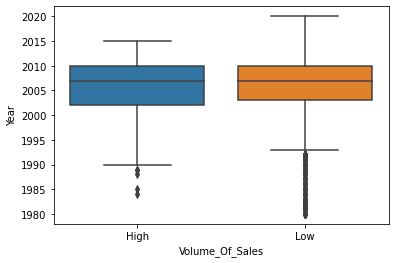

In [77]:
# use boxplot for measure if we have outliers
sns.boxplot(x='Volume_Of_Sales', y='Year', data=vgsales );

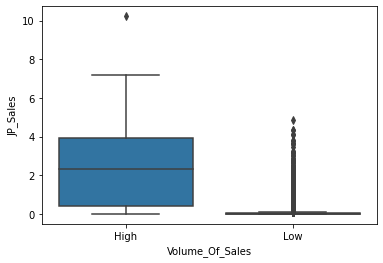

In [78]:
sns.boxplot(x='Volume_Of_Sales', y='JP_Sales', data=vgsales );

In [79]:
set(vgsales.Volume_Of_Sales)

{'High', 'Low'}

In [80]:
# split dataset to X,y Training and Testing 


X=vgsales.iloc[:, 6:11 ]
y=vgsales.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2)

# Now Ready to use models


In [81]:
print(X_train.shape)
print(X_test.shape)


(13032, 5)
(3259, 5)


In [82]:
print(y_train.shape)
print(y_test.shape)

(13032,)
(3259,)


In [83]:

# first explore what the k value is better
k_range = list(range(1,31))
k_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X ,y, cv=10, scoring='accuracy')
    k_score.append(scores.mean())
print(k_score)
    

[0.9944784146245015, 0.9946011893329114, 0.9944784146245015, 0.9945398019787064, 0.9946625013652095, 0.9946625013652095, 0.9946010386890975, 0.9946010386890975, 0.9944168766264824, 0.9945396513348925, 0.9944782263197339, 0.9947237757365542, 0.9946623130604421, 0.9947237004146471, 0.9947237004146471, 0.9947237004146471, 0.9947237004146471, 0.9947237004146471, 0.9947850124469451, 0.9948463998011501, 0.9949689862047928, 0.9950303735589978, 0.9950916855912958, 0.9950916855912958, 0.9952143473168455, 0.9952757346710506, 0.9951529599626404, 0.9952143473168453, 0.9955824078154011, 0.9955824078154011]


Text(0, 0.5, 'Cross-Validated Accuracy')

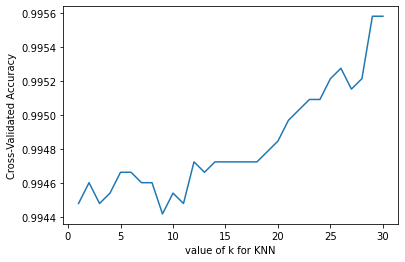

In [84]:
#plot the value of k for knn (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_score)
plt.xlabel('value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [85]:
# Classification Model

In [85]:

#Model:1 KNN
#use here KNN to gain score (test) with this model

VG_ClasModel = KNeighborsClassifier(15)
VG_ClasModel.fit(X_train, y_train)
VG_ClasModel.score(X_test,y_test)

1.0

In [86]:
#score (train) with this model
VG_ClasModel.score(X_train, y_train)

1.0

In [87]:
# the accuracy score by metrics 
VG_ClasModel = KNeighborsClassifier(n_neighbors=15)
VG_ClasModel.fit(X_train, y_train)
y_pred = VG_ClasModel.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

1.0


In [29]:
# cross validation with k=15 for KNN 10-fold
VG_ClasModel= KNeighborsClassifier(n_neighbors=15)
scores = cross_val_score(VG_ClasModel, X ,y, cv=10, scoring='accuracy')
print(scores)

NameError: name 'X' is not defined

In [92]:
# the avarge score appear from Knn
print(scores.mean())

0.9947237004146471


In [112]:
#Model:2 SVC
#use here SVC to gain score (test) with this model
VG_ClasModel = SVC(kernel="linear" , C =0.025)
VG_ClasModel.fit(X_train, y_train)
VG_ClasModel.score(X_test,y_test) 

1.0

In [113]:

# the avarge score appear from SVC by cross validation
scores = cross_val_score(VG_ClasModel, X ,y, cv=10, scoring='accuracy')
scores.mean()

0.9943556399160913

In [114]:
#Model:3 DecisionTreeClassifier
#use here DecisionTreeClassifier to gain score (test) with this model
VG_ClasModel = DecisionTreeClassifier(max_depth=5)
VG_ClasModel.fit(X_train[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']] , y_train)
VG_ClasModel.score(X_test,y_test)

1.0

[Text(167.4, 163.07999999999998, 'X[4] <= 10.07\ngini = 0.007\nsamples = 13032\nvalue = [47, 12985]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 12985\nvalue = [0, 12985]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 47\nvalue = [47, 0]')]

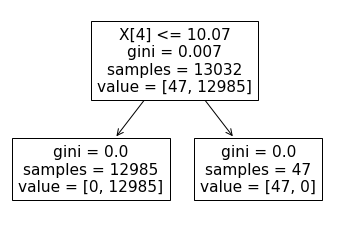

In [117]:
# tree plot for Decision Tree Classifier
tree.plot_tree(VG_ClasModel)

In [96]:
# the avarge score appear from DecisionTreeClassifier by cross validation
scores = cross_val_score(VG_ClasModel, X ,y, cv=10, scoring='accuracy')
scores.mean()

0.9942330535124487

In [97]:
#Model:4 MLPClassifier
#use here MLPClassifier to gain score (test) with this model
VG_ClasModel = MLPClassifier(alpha=1 , max_iter=1000)
VG_ClasModel.fit(X_train, y_train)
VG_ClasModel.score(X_test,y_test)

1.0

In [98]:
# the avarge score appear from MLPClassifier by cross validation
scores = cross_val_score(VG_ClasModel, X ,y, cv=10, scoring='accuracy')
scores.mean()

0.9985271554305213

In [99]:
#Model:5 RandomForestClassifier
#use here RandomForestClassifier to gain score (test) with this model
VG_ClasModel = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1) 
VG_ClasModel.fit(X_train, y_train)
VG_ClasModel.score(X_test,y_test)

1.0

In [100]:
# the avarge score appear from RandomForestClassifier by cross validation
scores = cross_val_score(VG_ClasModel, X ,y, cv=10, scoring='accuracy')
scores.mean()

0.9906747713038598

In [101]:
#Model:6 AdaBoostClassifier
#use here AdaBoostClassifier to gain score (test) with this model
VG_ClasModel = AdaBoostClassifier()
VG_ClasModel.fit(X_train, y_train)
VG_ClasModel.score(X_test,y_test)

1.0

In [102]:
# the avarge score appear from AdaBoostClassifier by cross validation
scores = cross_val_score(VG_ClasModel, X ,y, cv=10, scoring='accuracy')
scores.mean()

0.9805520719173568